# Basic Cross-Validation Experiment on the ExtraSensory data set

## Set up the Notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.abspath('..'))
import networkx as nx

## Import modules

In [2]:
from Blocks.data_loader import extrasensory_data_loader
from Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from Blocks.imputer import Imputer
from Blocks.normalizer import Normalizer
from Blocks.experimental_protocol import ExpTrainTest, ExpCV, ExpWithin
from Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, DataYieldReport

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt

from Workflow.workflow import workflow
import Workflow.compute_graph
import time
import pandas as pd


## Define the workflow

This workflow performs a 5-fold cross-validation experiment on the ExtraSensory data set sleeping prediction task. The model used is logistic regression with a fixed regularization hyper-parameter. 

The workflow includes a column filter that screens out feature dimensions that are less than 20% observed, and a missing label filter that removes instances without labels. Next, the workflow performs mean imputation followed by feature normalization. Lastly, the cross-validation experiment is run on the pre-processed data set and results are evaluated using four metrics (accuracy, F1, precision and recall). The results from each fold are combined and then summarized.

The workflow computation graph is then created and displayed, and the results are then displayed. 

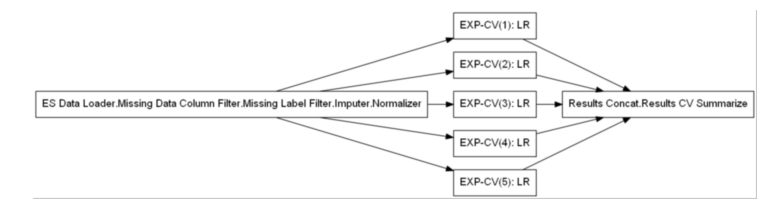

Running Scheduler multithread_pipeline
  Running Parallel Scheduler

2140542495824
Scheduled:  Loading Extrasensory pkl file...
 ES Data Loader.Missing Data Column Filter.Missing Label Filter.Imputer.Normalizer
Running: ES Data Loader.Missing Data Column Filter.Missing Label Filter.Imputer.Normalizer
Time taken by node ES Data Loader : 17.89507484436035
2138896181624
Time taken by node Missing Data Column Filter : 1.6981287002563477
2140505152928
Time taken by node Missing Label Filter : 0.37257862091064453
2140505151696
  Imputer: Running on matrix of size 285268x224
Time taken by node Imputer : 2.709109306335449
2140505152816
  Normalizer: running matrix of size 285268x224
Time taken by node Normalizer : 3.3522446155548096
Time taken by Normalizer : 26.0341215133667
None
Done: ES Data Loader.Missing Data Column Filter.Missing Label Filter.Imputer.Normalizer
2140505151192
Scheduled: EXP-CV(1): LR
Scheduled: EXP-CV(2): LR
Scheduled: EXP-CV(4): LR
Running: EXP-CV(1): LR
2140505086104
Sc

accuracy_score  f1_score  precision_score  recall_score
Method Fold                                                         
LR     1           0.891312  0.786602         0.773050      0.800638
       2           0.890033  0.785082         0.780076      0.790154
       3           0.893627  0.832079         0.787507      0.881999
       4           0.868644  0.797021         0.863027      0.740394
       5           0.915752  0.856460         0.887447      0.827564

Time taken by node Results Concat : 0.04361867904663086
2140562245504
  Summarizing CV results table


accuracy_score            f1_score           precision_score            \
                 mean       sem      mean       sem            mean       sem   
Method                                                                          
LR           0.891874  0.007472  0.811449  0.014093        0.818221  0.023705   

       recall_score           
               mean      sem  
Method                        
LR          0.80815  0.02324

Time taken by node Results CV Summarize : 0.03396964073181152
Time taken by Results CV Summarize : 0.07858633995056152
None
Done: Results Concat.Results CV Summarize
  Workflow complete

81.30790066719055


In [26]:
import time
time1 = time.time()
estimators = {"LR": LogisticRegression(solver="lbfgs",max_iter=100)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING");
# print(df_raw.parents)
df_cf     = MisingDataColumnFilter(df_raw);
# print(df_cf.args_parents)
df_lf     = MisingLabelFilter(df_cf);
# print(df_lf.args_parents)
df_imp    = Imputer(df_lf)
df_norm   = Normalizer(df_imp);
res_cv    = ExpCV(df_norm, estimators, metrics=metrics);
# flow=workflow(res_cv);
# print(res_cv[0].args_parents)
res_cat   = ResultsConcat(res_cv)
# print(res_cat.args_parents)
summary   = ResultsCVSummarize(res_cat)

flow=workflow([summary]); 
# print(list(flow.graph.nodes))
# flow.draw(); plt.show();
flow.drawPipelined(); plt.show();
output=flow.run(backend = "multithread_pipeline", num_workers = 2);
print(time.time()-time1)

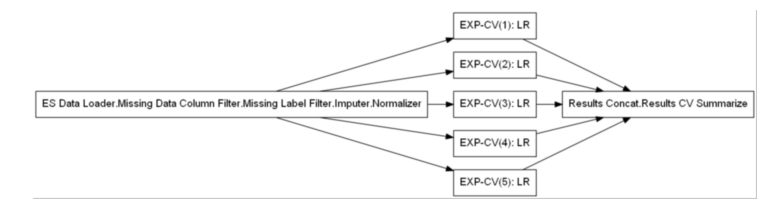

Running Scheduler sequential
  Running Sequential Scheduler

Running step ES Data Loader
  Loading Extrasensory pkl file...

Running step Missing Data Column Filter

Running step Missing Label Filter

Running step Imputer
  Imputer: Running on matrix of size 285268x224

Running step Normalizer
  Normalizer: running matrix of size 285268x224

Running step EXP-CV(5): LR
  Fitting and testing LR

Running step EXP-CV(4): LR
  Fitting and testing LR

Running step EXP-CV(3): LR
  Fitting and testing LR

Running step EXP-CV(2): LR
  Fitting and testing LR

Running step EXP-CV(1): LR
  Fitting and testing LR

Running step Results Concat
  Concatenating Results


accuracy_score  f1_score  precision_score  recall_score
Method Fold                                                         
LR     1           0.890047  0.784535         0.769579      0.800083
       2           0.890903  0.785734         0.784531      0.786941
       3           0.896142  0.835112         0.794429      0.880187
       4           0.868540  0.796882         0.862769      0.740344
       5           0.916764  0.859033         0.884437      0.835049


Running step Results CV Summarize
  Summarizing CV results table


accuracy_score            f1_score           precision_score            \
                 mean       sem      mean       sem            mean       sem   
Method                                                                          
LR           0.892479  0.007696  0.812259  0.014864        0.819149  0.022838   

       recall_score            
               mean       sem  
Method                         
LR         0.808521  0.023478


  Workflow complete

60.78335905075073


In [17]:
time1 = time.time()
estimators = {"LR": LogisticRegression(solver="lbfgs",max_iter=100)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING");
# print(df_raw.parents)
df_cf     = MisingDataColumnFilter(df_raw);
# print(df_cf.args_parents)
df_lf     = MisingLabelFilter(df_cf);
# print(df_lf.args_parents)
df_imp    = Imputer(df_lf)
df_norm   = Normalizer(df_imp);
res_cv    = ExpCV(df_norm, estimators, metrics=metrics);
# flow=workflow(res_cv);
# print(res_cv[0].args_parents)
res_cat   = ResultsConcat(res_cv)
# print(res_cat.args_parents)
summary   = ResultsCVSummarize(res_cat)

flow=workflow([summary]); 
# print(list(flow.graph.nodes))
flow.draw(); plt.show();
flow.drawPipelined(); plt.show();
output=flow.run();
print(time.time()-time1)

In [21]:
descendants = nx.descendants(flow.graph,source='1760002451384')
for descendant_id in descendants:
    print(descendant_id)

ES Data Loader
Missing Data Column Filter
Missing Label Filter
Imputer
Normalizer
EXP-CV(5): LR
EXP-CV(4): LR
EXP-CV(3): LR
EXP-CV(2): LR
EXP-CV(1): LR
Results Concat
Results CV Summarize


In [11]:
execute_order = list(nx.topological_sort(flow.graph))
for id in execute_order:
    print(flow.graph.node[id]["block"].name)
#     print(type(flow.graph.node[id]["block"].name))
#     print(flow.graph.has_node(id))
#     break
    print("successors: ")
    for i in list(flow.graph.successors(id)):
        
        print(flow.graph.node[i]["block"].name)
        print("\n")
    
#     descendants = nx.descendants(flow.graph,source=id)
#     print("Descendents: ")
#     for descendant_id in descendants:
#         print("            " + flow.graph.node[descendant_id]["block"].name)

ES Data Loader
successors: 
Missing Data Column Filter


Missing Data Column Filter
successors: 
Missing Label Filter


Missing Label Filter
successors: 
Imputer


Imputer
successors: 
Normalizer


Normalizer
successors: 
EXP-CV(1): LR


EXP-CV(2): LR


EXP-CV(3): LR


EXP-CV(4): LR


EXP-CV(5): LR


EXP-CV(5): LR
successors: 
Results Concat


EXP-CV(4): LR
successors: 
Results Concat


EXP-CV(3): LR
successors: 
Results Concat


EXP-CV(2): LR
successors: 
Results Concat


EXP-CV(1): LR
successors: 
Results Concat


Results Concat
successors: 
Results CV Summarize


Results CV Summarize
successors: 


In [18]:
node_list = list(nx.dfs_preorder_nodes(flow.graph, source=execute_order[0]))
process_dict = {}
marked_nodes = []
key_num = 0
for i, id in enumerate(node_list):
    marked_nodes.append(id)
    if len(list(flow.graph.predecessors(id))) == 0:
#         marked_nodes.append(id)
        process_dict[key_num] = [flow.graph.node[id]["block"].name]
        if len(list(flow.graph.successors(id))) == 1:
            if list(flow.graph.successors(id))[0] in marked_nodes:
                key_num += 1
        elif len(list(flow.graph.successors(id))) == 0:
            key_num += 1
        elif len(list(flow.graph.successors(id))) > 1:
#             marked_nodes.append(id)
            key_num += 1
            
    elif len(list(flow.graph.predecessors(id))) == 1:
        if len(list(flow.graph.successors(id))) == 1:
#                 marked_nodes.append(id)
            if key_num not in process_dict.keys():
                process_dict[key_num] = [flow.graph.node[id]["block"].name]
            else:
                process_dict[key_num].append(flow.graph.node[id]["block"].name)
            if list(flow.graph.successors(id))[0] in marked_nodes:
#                 marked_nodes.append(id)
                key_num += 1
        elif len(list(flow.graph.successors(id))) == 0:
            if key_num not in process_dict.keys():
                process_dict[key_num] = [flow.graph.node[id]["block"].name]
                key_num += 1
            else:
                process_dict[key_num].append(flow.graph.node[id]["block"].name)
                key_num += 1
        elif len(list(flow.graph.successors(id))) > 1:
            if key_num not in process_dict.keys():
#                 marked_nodes.append(id)
                process_dict[key_num] = [flow.graph.node[id]["block"].name]
            else:
                process_dict[key_num].append(flow.graph.node[id]["block"].name)
#             marked_nodes.append(id)
            key_num += 1
                
    elif len(list(flow.graph.predecessors(id))) > 1:
        key_num += 1
#         marked_nodes.append(id)
        if len(list(flow.graph.successors(id))) == 1:
            process_dict[key_num] = [flow.graph.node[id]["block"].name]
            if list(flow.graph.successors(id))[0] in marked_nodes:
#                 marked_nodes.append(id)
                key_num += 1
        elif len(list(flow.graph.successors(id))) == 0:
            process_dict[key_num] = [flow.graph.node[id]["block"].name]
#             marked_nodes.append(id)
            key_num += 1
        elif len(list(flow.graph.successors(id))) > 1:
            process_dict[key_num] = [flow.graph.node[id]["block"].name]
#             marked_nodes.append(id)
            key_num += 1
    
print(process_dict)
        
        

{0: ['ES Data Loader', 'Missing Data Column Filter', 'Missing Label Filter', 'Imputer', 'Normalizer'], 1: ['EXP-CV(1): LR'], 2: ['Results Concat', 'Results CV Summarize'], 3: ['EXP-CV(2): LR'], 4: ['EXP-CV(3): LR'], 5: ['EXP-CV(4): LR'], 6: ['EXP-CV(5): LR']}


In [19]:
print(marked_nodes)

['3037775118176', '3037775116720', '3037775116440', '3037775294536', '3037775294592', '3037775294704', '3037775294928', '3037775295544', '3037775294984', '3037775295096', '3037775295208', '3037775295432']


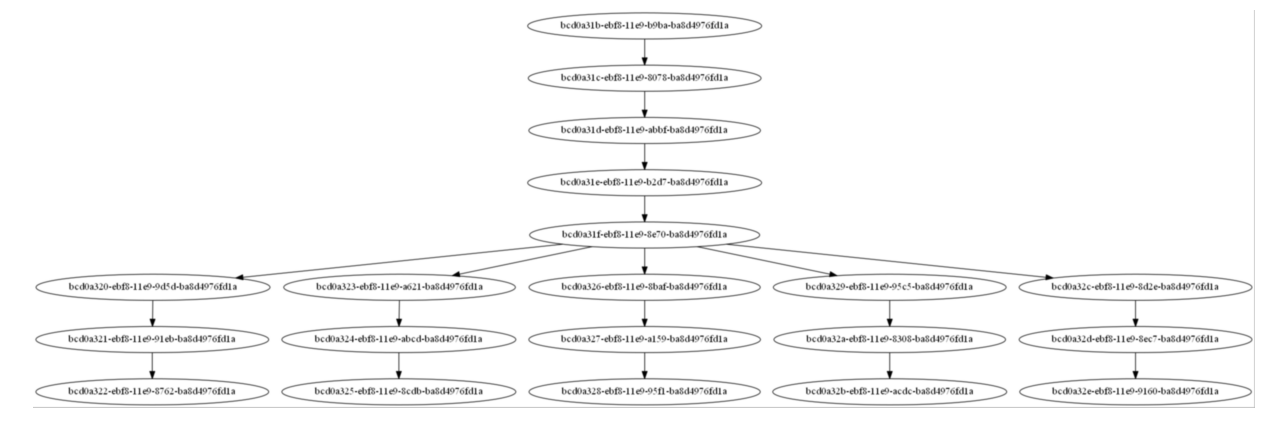

In [30]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.image as mpimg
b = nx.dag_to_branching(flow.graph)
pdot = nx.drawing.nx_pydot.to_pydot(b)
pdot.write_png("Temp/temp.png")
pdot.write_pdf("Temp/temp.pdf")
img=mpimg.imread('Temp/temp.png')
plt.figure(1,figsize=(img.shape[1]/100,img.shape[0]/100))
plt.imshow(img,interpolation='bicubic')
plt.axis('off')
plt.show()
           

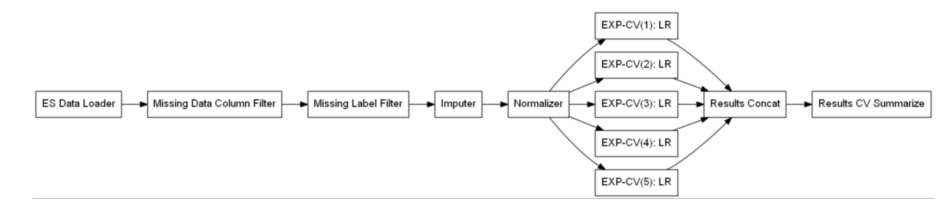

In [25]:
flow.draw(); plt.show();

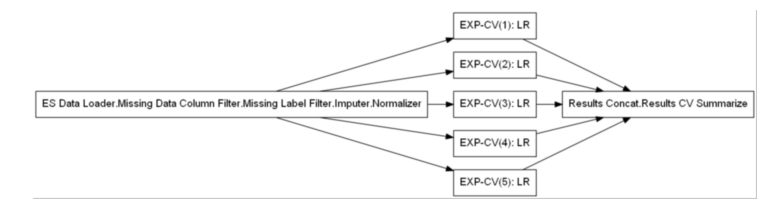

In [38]:
flow.drawPipelined(); plt.show();